In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### The goal of this file will be to make an exploratory analysis of the speaker attributes parquet file (already treated)

We are interested in understanding the dataset, finding missing values and plotting the distribution for some of the features

In [3]:
speaker_attributes = pd.read_parquet("data/speaker_attributes_updated.parquet")

speaker_attributes.head(10)

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Great Britain, United States of America]",[male],1395141751,None,W000178,"[politician, military officer, farmer, cartogr...",[independent politician],None,Q23,George Washington,"[1792 United States presidential election, 178...",item,[Episcopal Church]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[United Kingdom],[male],1395737157,[White British],None,"[playwright, screenwriter, novelist, children'...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Belgium],[male],1380367296,None,None,"[writer, lawyer, librarian, information scient...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[United States of America],[male],1395142029,None,None,"[politician, motivational speaker, autobiograp...",[Republican Party],None,Q207,George W. Bush,"[2000 United States presidential election, 200...",item,"[United Methodist Church, Episcopal Church, Me..."
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Spain],[male],1391704596,None,None,[painter],None,None,Q297,Diego Velázquez,None,item,None
5,"[Augusto Pinochet Ugarte, Augusto José Ramón P...",[+1915-11-25T00:00:00Z],[Chile],[male],1392242213,None,None,"[military officer, politician]",[independent politician],None,Q368,Augusto Pinochet,None,item,[Catholicism]
6,"[Baudelaire, Charles Pierre Baudelaire-Dufaÿs,...",[+1821-04-09T00:00:00Z],[France],[male],1386699038,[French],None,"[poet, art critic, essayist, translator, write...",None,None,Q501,Charles Baudelaire,None,item,[Catholicism]
7,"[Mikołaj Kopernik, Nikolaus Kopernikus, Copern...",[+1473-02-19T00:00:00Z],[Kingdom of Poland],[male],1394975677,[Poles],None,"[astronomer, jurist, economist, mathematician,...",None,None,Q619,Nicolaus Copernicus,None,item,[Catholicism]
8,"[Neil Percival Young, Shakey, Godfather of Gru...",[+1945-11-12T00:00:00Z],"[Canada, United States of America]",[male],1395459626,None,None,"[singer, singer-songwriter, film director, mus...",None,None,Q633,Neil Young,None,item,None
9,None,[+1969-00-00T00:00:00Z],[Germany],[male],1340253739,None,None,"[photographer, Wikimedian]",None,None,Q640,Harald Krichel,None,item,None


In [4]:
## What is the size of the dataframe ?
print(speaker_attributes.shape)

(9055981, 15)


Since the dataframe is very big (almost one million rows) we will analyse one sample of 10000 rows instead of the full dataframe to speed up operations.

In [5]:
df_sample = speaker_attributes.sample(10000)
del(speaker_attributes) # we don't want to have it in memory

In [6]:
df_sample

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
3068305,None,None,None,None,1354363184,None,None,[researcher],None,None,Q86845431,Ruxandra Julia Vorovenci,None,item,None
6824341,"[Jesus Sanchez, Jesús Paulino Sánchez]",[+1974-10-11T00:00:00Z],[Dominican Republic],[male],1376120988,None,None,[baseball player],None,None,Q931681,Jesús Sánchez,None,item,None
7792287,None,None,None,[male],1336711849,None,None,None,None,None,Q97619785,None,None,item,None
3014877,None,None,None,[female],1253957196,None,None,None,None,None,Q76116172,Mary Anne Spark,None,item,None
4062772,None,None,None,[male],995057415,None,None,None,None,None,Q65892295,Yu Yongping,None,item,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736048,None,[+1959-10-04T00:00:00Z],[Kingdom of the Netherlands],[male],1314079187,None,None,[field hockey player],None,None,Q2578580,Maarten van Grimbergen,None,item,None
3317239,None,None,None,None,1360205921,None,None,None,None,None,Q101144555,Nelson K Horigoshi,None,item,None
6284149,None,None,None,None,954569186,None,None,None,None,None,Q62998427,J. D. Donachie,None,item,None
359066,None,None,None,[male],1364511021,None,None,[musician],None,None,Q20608672,Petur Mohr Reinert,None,item,None


As we can see there are a lot of speakers without any alias, how many ?

### Aliases

In [83]:
def count_none_values(attribute_name):
    df_sample_without_nan = df_sample.dropna(subset = [attribute_name])
    print('the number of None values is', 10000 - len(df_sample_without_nan))

In [84]:
count_none_values('aliases')

the number of None values is 8617


We have a lot of missing values, we expect a great number of missing values in the whole speaker attributes file too, what about the nationality ?

### Nationality

In [85]:
count_none_values('nationality')

the number of None values is 5844


This is a huge number too. Which are the most frequents nationalies (removing the None values) ?

In [92]:
def remove_none_values(attribute_name):
    return df_sample.dropna(subset = [attribute_name])

In [140]:
## We remove the None values
list_nat = remove_none_values('nationality').copy()
list_nat["count"] = list_nat["nationality"].transform(lambda x: x[0])
df_visual = list_nat["count"].value_counts().to_frame()

In [142]:
# we create a dataframe for visualization:
df_visual.sort_values('count', ascending=False)[0:10]

,count
United States of America,470
Germany,304
France,284
Japan,203
United Kingdom,177
Spain,142
Ming dynasty,140
Italy,111
Poland,99
Soviet Union,90


These are the most common nationalities

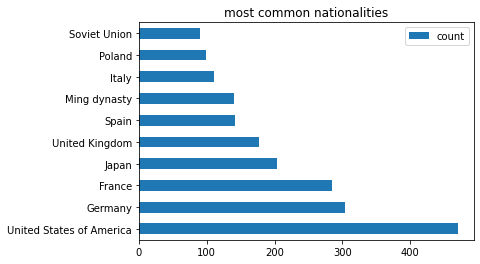

In [143]:
data = df_visual.sort_values('count', ascending=False)[0:10].plot(kind = 'barh')
plt.title('most common nationalities')
plt.show()

Another attribute we are interested in (for our task is the gender), it could be interested to notice if there are more males speaking about politics than females (we will of course make this analysis in milestone 3), now let us focus on the distribution of the gender for the whole speaker attributes sample.

### Gender

How many missing values ?

In [144]:
count_none_values('gender')

the number of None values is 2084


This time we have a bit less missing values, let us see how is the distribution of the gender.

In [153]:
df_visual = remove_none_values('gender').copy()

df_visual["gender"] = df_visual["gender"].transform(lambda x: x[0])

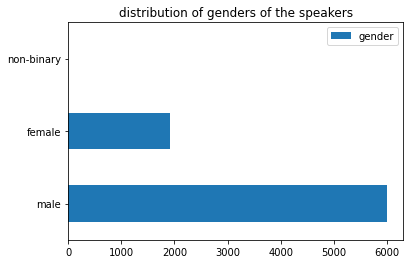

In [154]:
# we create a dataframe for visualization:
df_visual["gender"].value_counts().to_frame().plot(kind = 'barh')
plt.title('distribution of genders of the speakers')
plt.show()

The majority of the speakers are males (the number of male speakers is 3 times the number of female ones)

Another question which might arise spontanously is the following. What are the most common occupations of the speakers ? Indeed, it could be interesting to understand if people doing a certain job are more inc

### Occupations

In [16]:
count_none_values('occupation')

the number of None values is 2984


In [160]:
df_visual = remove_none_values('occupation')
list_occ = [item for sublist in df_visual["occupation"].values for item in sublist]

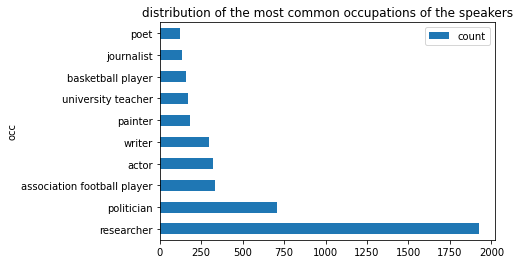

In [161]:
# we create a dataframe for visualization: 
df_visual = pd.DataFrame({'occ': list_occ, 'count':np.ones(len(list_occ))})
df_visual.groupby(by = 'occ').count().sort_values('count', ascending=False)[0:10].plot(kind='barh' )
plt.title('distribution of the most common occupations of the speakers')
plt.show()

Reasearchers are the most frequent speaker in the parquet file.

Finally, for our purpose, it could be interesting to understand how many missing value we have for the degree attribute and how is the distribution of this feature, indeed it could be interesting to see which people tend to speak more about a politician (people with/without degree). However, to do so, we have to consider before how many people in general have a degree in the attribute_speaker dataset. 

### Degree

In [163]:
count_none_values('academic_degree')

the number of None values is 9876


We have too few non NaN values in this column for a meaningful analysis. However, let us try at least to understand how is the distribution for this feature.

In [182]:
df_visual = remove_none_values('academic_degree').copy()

df_visual["count"] = df_visual["academic_degree"].transform(lambda x: x[0])

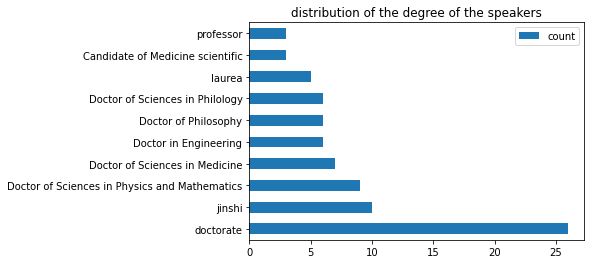

In [183]:
# we create a dataframe for visualization:
df_visual = df_visual["count"].value_counts().to_frame()

df_visual.sort_values('count', ascending=False)[0:10].plot(kind='barh' )
plt.title('distribution of the degree of the speakers')
plt.show()

The majority of them has a doctorate (this relates to the fact that the majority of them were researchers).

### Conclusions

In this notebook we made some exploratory data analysis on the speaker attributes dataframe. These analysis can be meaningful because we plan to compare them with similar analysis but for a subset of the speaker attributes data: we would like to repeat similar analysis for speakers whose quotes are referring to Trump/Clinton in order to see if there are noticeable differences.